<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predicting Insurance Charges." </div>

Develop a model to predict the insurance charges (**charges**). This model can help the insurance company in setting premiums more accurately.

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing and feature engineering](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


## 1. Exploring The dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linearRegression.fit(x_train, y_train)

# from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.iloc[200:205]

,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0,no,northwest,2130.67590
201,48,female,32.230,1,no,southeast,8871.15170
202,60,female,24.035,0,no,northwest,13012.20865
203,27,female,36.080,0,yes,southeast,37133.89820
204,46,male,22.300,0,no,southwest,7147.10500


In [6]:
data.loc[200:205]

,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0,no,northwest,2130.67590
201,48,female,32.230,1,no,southeast,8871.15170
202,60,female,24.035,0,no,northwest,13012.20865
203,27,female,36.080,0,yes,southeast,37133.89820
204,46,male,22.300,0,no,southwest,7147.10500
205,28,female,28.880,1,no,northeast,4337.73520


# 2. Exploratory Data Analysis (EDA)

### 2.1 Discovering

In [7]:
data.shape

(1338, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2.2 Joining

### 2.3 Validating
You perform a quick check that the new data doesn’t have mistakes or misspellings.

### 2.4 Structuring
You structure the data in different time periods and segments to understand trends. 
### 2.5 Validating
You do another quick check to ensure the new columns you’ve made in structuring are correctly designed. 


### 2.6 Cleaning
You check for outliers, missing data, and needs for conversions or transformations, 


#### 2.6.1 Missing values

In [10]:
## check missing value
data.isnull().sum()
data.dropna() ## drop missing value


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 2.6.2 duplicated


In [11]:
data.duplicated().sum() ## check duplicated
data.drop_duplicates(inplace=True)

### 2.6.3 Outlier


### Age

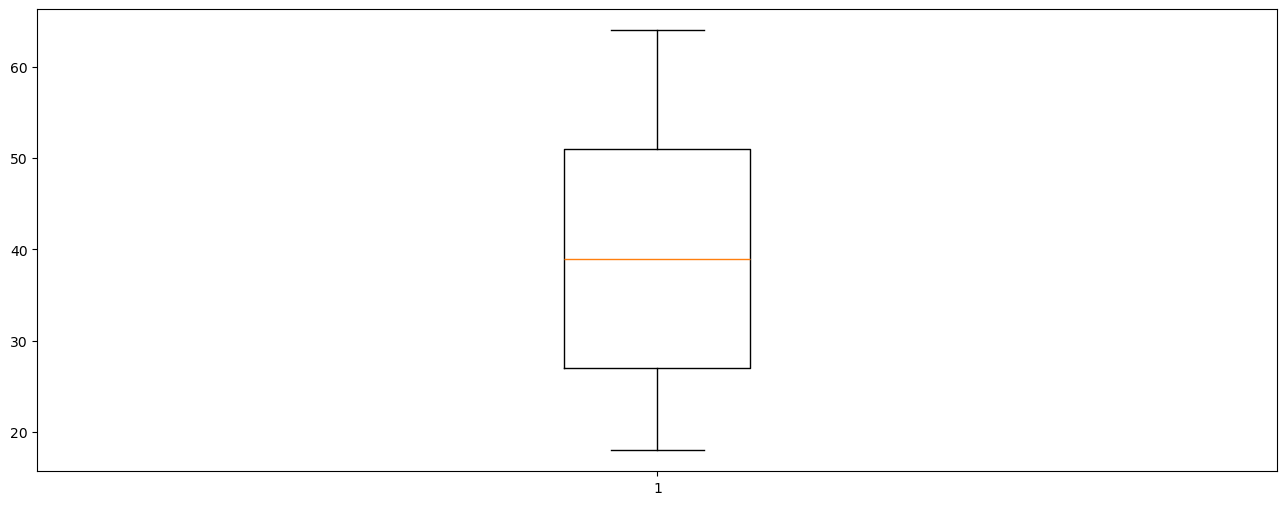

In [12]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.boxplot(x = data['age'])
plt.show()

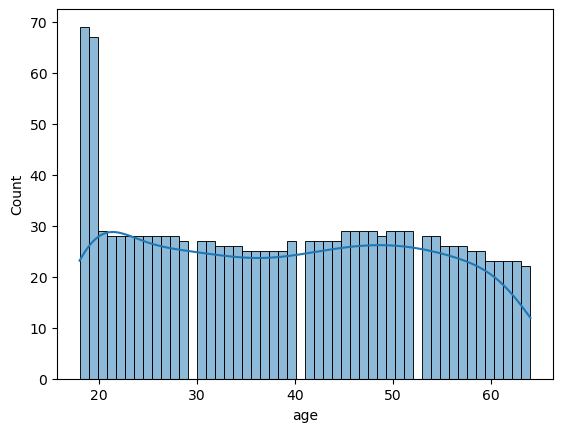

In [13]:
sns.histplot(x = data['age'], kde=True, bins = 50)
plt.show()
## kernel density estimate (KDE)

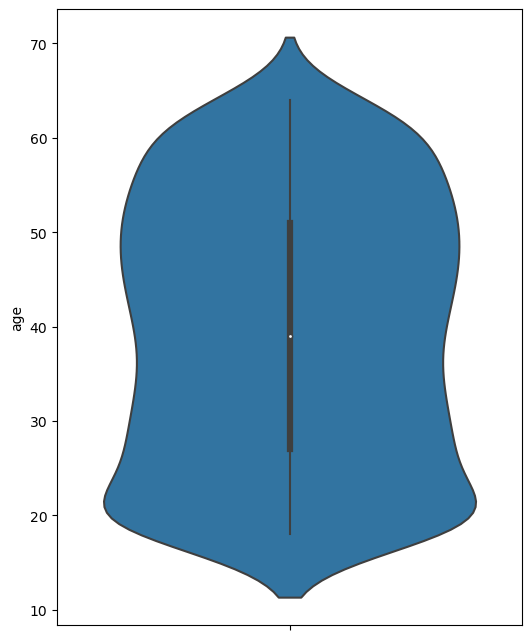

In [14]:
fig, ax = plt.subplots(figsize = (6, 8))
sns.violinplot(y = data['age'])
plt.show()

<Axes: xlabel='age'>

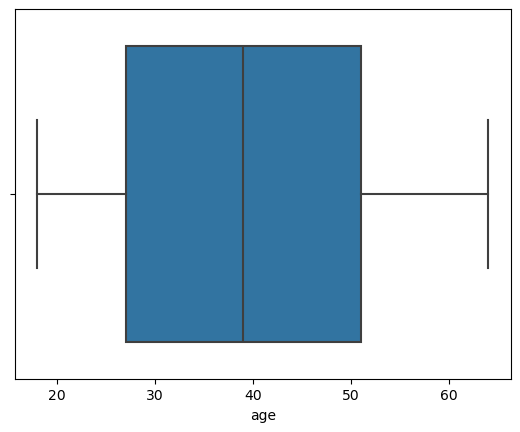

In [15]:
sns.boxplot(x = data['age'])

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### charges

In [17]:
data['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

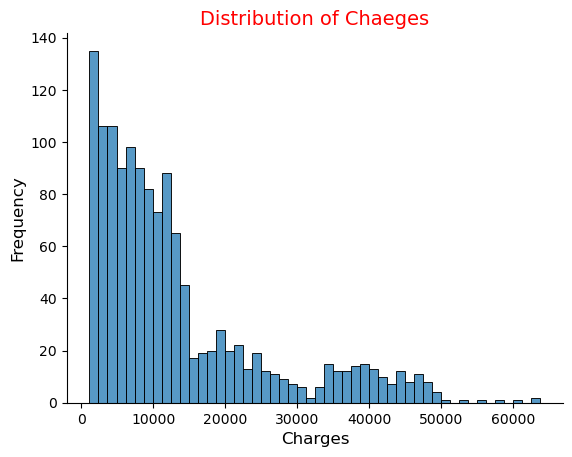

In [18]:
fig, ax = plt.subplots()
sns.histplot(x = data['charges'], bins = 50)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('Distribution of Chaeges', fontsize = 14, color ='r')
ax.set_xlabel('Charges', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
fig.savefig('Distribution of Charges.png', dpi= 300)
plt.show()

<Axes: >

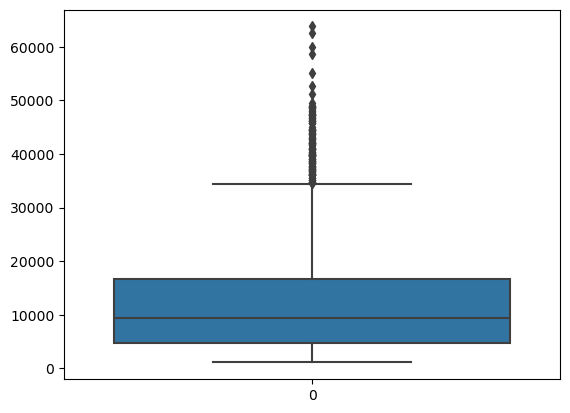

In [20]:
sns.boxplot(data['charges'])

In [21]:
data[data['charges']>40000].index

Index([  34,   39,   55,   86,   94,  109,  146,  175,  185,  251,  252,  254,
        256,  265,  271,  281,  288,  292,  312,  327,  328,  330,  338,  381,
        420,  421,  488,  530,  543,  549,  569,  577,  587,  615,  621,  629,
        665,  667,  668,  674,  677,  682,  697,  706,  725,  736,  739,  742,
        819,  826,  845,  852,  856,  860,  883,  893,  901,  951,  956,  958,
       1022, 1031, 1047, 1062, 1090, 1096, 1111, 1122, 1124, 1146, 1152, 1218,
       1230, 1240, 1241, 1284, 1300, 1301, 1323],
      dtype='int64')

In [22]:
data.drop(index = data[data['charges']>40000].index,inplace=True)

In [23]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
# data_numeric = ['age', 'bmi', 'charges']
data_categorical = ['sex', 'smoker','region' ]

In [25]:
data[data_categorical]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [26]:
# data[data_numeric]

In [27]:
# sns.boxplot(data[data_numeric])

In [28]:
# data[data_categorical]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [29]:
data['sex'].value_counts()

sex
female    630
male      628
Name: count, dtype: int64

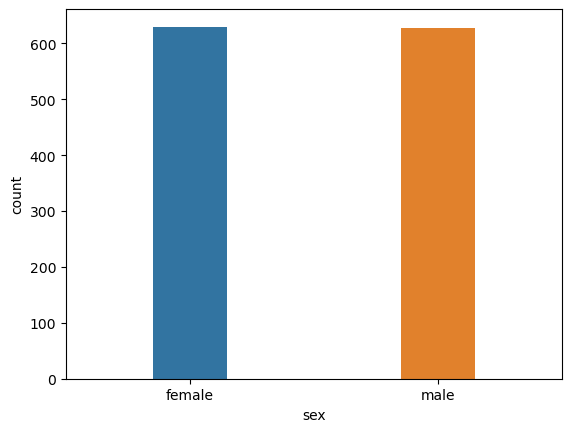

In [32]:
sns.countplot(x = data['sex'], width=.3)
plt.show()

In [33]:
data['region'].value_counts()

region
southeast    328
southwest    311
northwest    310
northeast    309
Name: count, dtype: int64

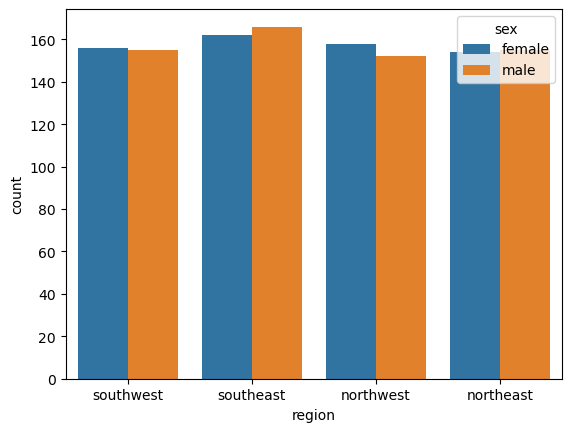

In [36]:
sns.countplot(x = data['region'], hue = data['sex']);

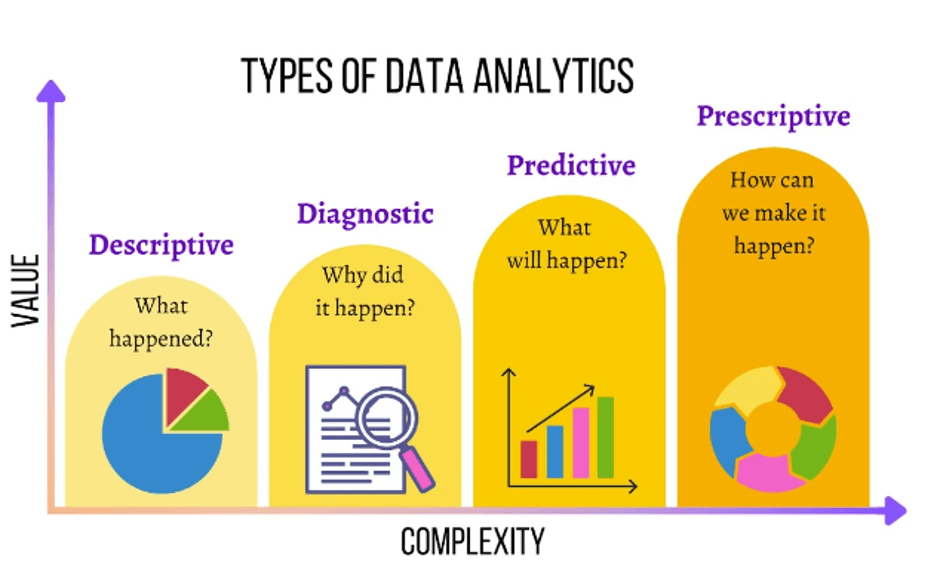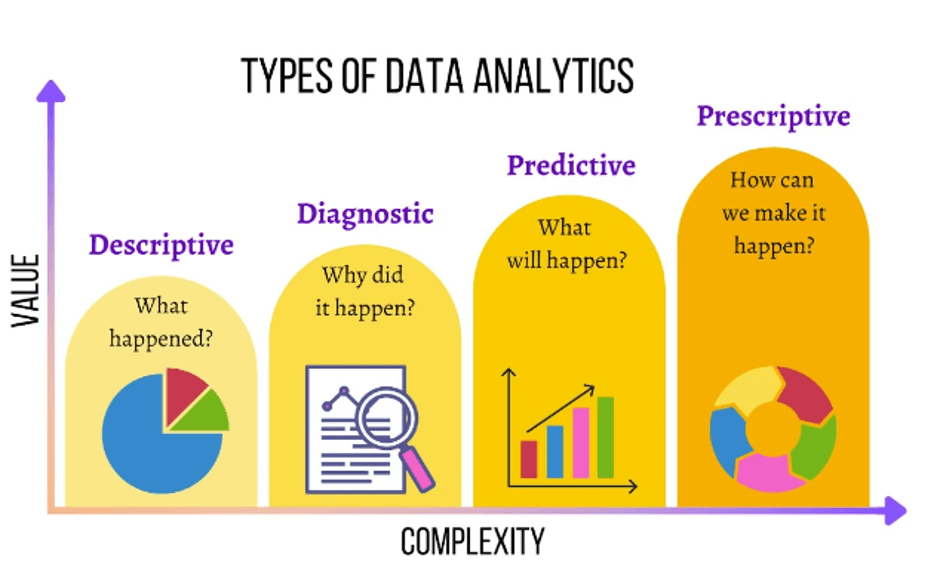

<Axes: xlabel='age', ylabel='Count'>

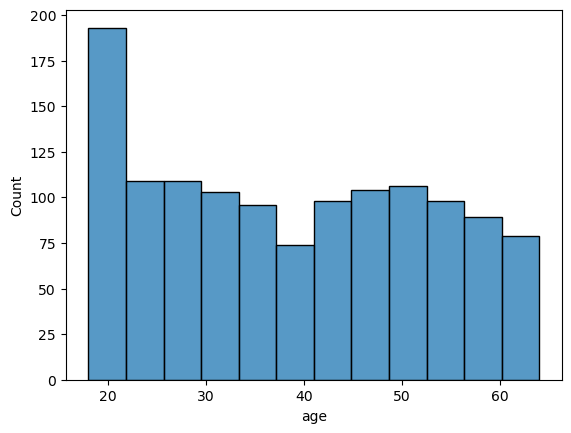

In [37]:
sns.histplot(x = data['age'])

## Diagnostics


In [40]:
# data[data_numeric]

In [41]:
data_numeric = ['children','age', 'bmi', 'charges']

### correlation coefficient

## Scatter plot

<Axes: xlabel='children', ylabel='charges'>

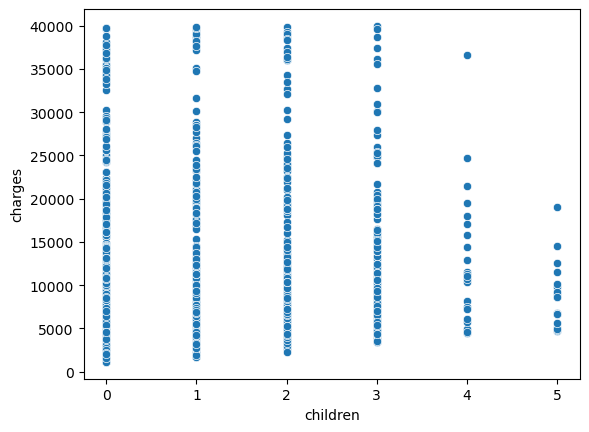

In [42]:
sns.scatterplot(x = data['children'], y = data['charges'])

<Axes: xlabel='age', ylabel='charges'>

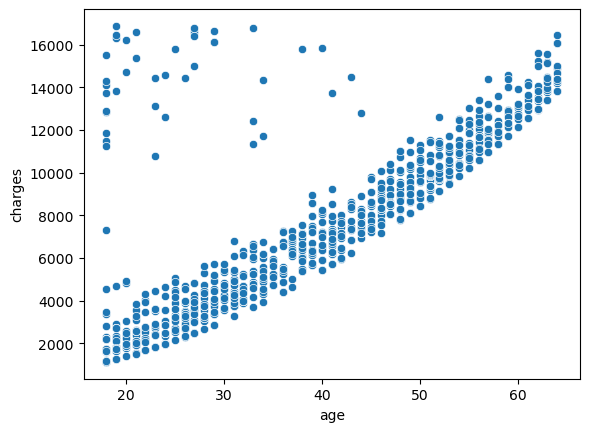

In [51]:
sns.scatterplot(x = data['age'], y = data['charges'])

In [50]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.049576,0.016409,0.140932
age,0.049576,1.000000,0.144139,0.815179
bmi,0.016409,0.144139,1.000000,0.043406
charges,0.140932,0.815179,0.043406,1.000000


## 3. Data preprocessing

In [46]:
data['charges'].describe()

count     1258.000000
mean     11244.344235
std       9182.733316
min       1121.873900
25%       4527.756463
50%       8749.239125
75%      13911.859300
max      39983.425950
Name: charges, dtype: float64

In [47]:
data.shape

(1258, 7)

In [48]:
1258*.8

1006.4000000000001

In [49]:
data.drop(index = data[data['charges']>17000].index, inplace=True)

In [52]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.049576,0.016409,0.140932
age,0.049576,1.000000,0.144139,0.815179
bmi,0.016409,0.144139,1.000000,0.043406
charges,0.140932,0.815179,0.043406,1.000000


In [53]:
x = np.arange(2, 50, 5)
x

array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])

In [54]:
y = x*2 -3


In [55]:
y

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

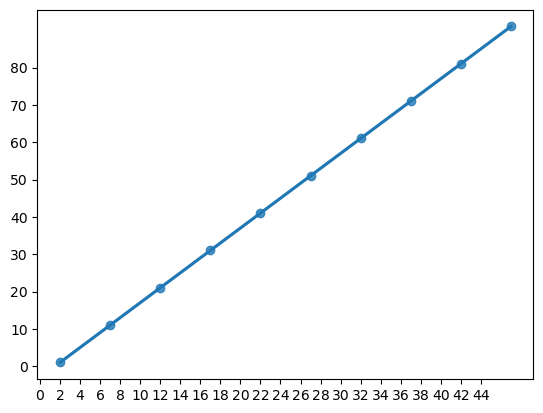

In [56]:
sns.regplot(x = x, y = y)
plt.xticks(np.arange(0, 45, 2))
plt.yticks(np.arange(0, 90, 10))
plt.show()

<Axes: xlabel='age', ylabel='charges'>

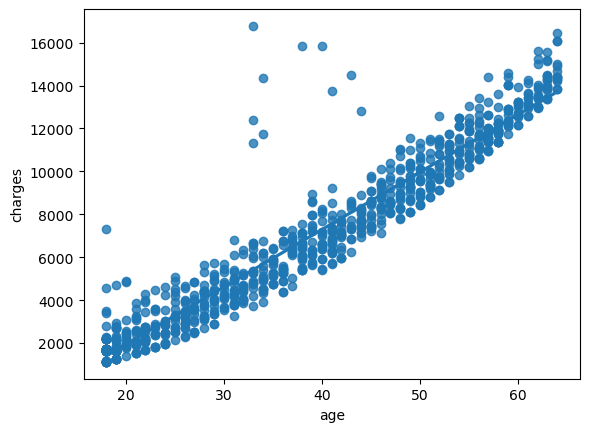

In [63]:
sns.regplot(x = data['age'], y = data['charges'])

In [59]:
data.drop(index = data[(data['age']<30 )&
          (data['charges']>10000)].index, inplace=True)

In [60]:
data

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [61]:
data[(data['age']<30 )& (data['charges']>10000)]

,age,sex,bmi,children,smoker,region,charges


In [62]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.035175,0.016669,0.174001
age,0.035175,1.000000,0.121219,0.956020
bmi,0.016669,0.121219,1.000000,0.100563
charges,0.174001,0.956020,0.100563,1.000000


In [64]:
# 100 * len(data[(data['age']<30 )& (data['charges']>10000)])/data.shape[0]

In [66]:
# data['charges'].quantile([0, 0.80])

## change value as string to numeric

In [82]:
df = data.copy()

In [83]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,1,33.77,1,0,1725.5523,False,False,True,False
2,28,1,33.00,3,0,4449.4620,False,False,True,False
4,32,1,28.88,0,0,3866.8552,False,True,False,False
5,31,0,25.74,0,0,3756.6216,False,False,True,False
6,46,0,33.44,1,0,8240.5896,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.70,3,0,11411.6850,False,False,False,True
1333,50,1,30.97,3,0,10600.5483,False,True,False,False
1334,18,0,31.92,0,0,2205.9808,True,False,False,False
1335,18,0,36.85,0,0,1629.8335,False,False,True,False


In [84]:
df['sex'].replace({'female':1,
                  'male':0}, inplace=True)

In [85]:
df['smoker'].replace({'no':0,
                     'yes':1}, inplace=True)

In [87]:
# df['region'].value_counts()

In [88]:
df = pd.get_dummies(data = df, prefix= 'region')

In [78]:
# #Label Encoding for (categorical variables)
# data['sex_l'] = LabelEncoder().fit_transform(data['sex'])
# data['smoker_l'] = LabelEncoder().fit_transform(data['smoker'])
# # data['region_l'] = LabelEncoder().fit_transform(data['region'])
# data

In [92]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,1,33.77,1,0,1725.5523,False,False,True,False
2,28,1,33.00,3,0,4449.4620,False,False,True,False
4,32,1,28.88,0,0,3866.8552,False,True,False,False
5,31,0,25.74,0,0,3756.6216,False,False,True,False
6,46,0,33.44,1,0,8240.5896,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.70,3,0,11411.6850,False,False,False,True
1333,50,1,30.97,3,0,10600.5483,False,True,False,False
1334,18,0,31.92,0,0,2205.9808,True,False,False,False
1335,18,0,36.85,0,0,1629.8335,False,False,True,False


## 4. Model building

In [93]:
### Split to train and test

In [94]:
from sklearn.model_selection import train_test_split

In [97]:
x = df.drop(columns='charges')
y = df['charges']
len(y)

975

In [99]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1,18,1,33.77,1,0,False,False,True,False
2,28,1,33.00,3,0,False,False,True,False
4,32,1,28.88,0,0,False,True,False,False
5,31,0,25.74,0,0,False,False,True,False
6,46,0,33.44,1,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1332,52,0,44.70,3,0,False,False,False,True
1333,50,1,30.97,3,0,False,True,False,False
1334,18,0,31.92,0,0,True,False,False,False
1335,18,0,36.85,0,0,False,False,True,False


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=90)

In [102]:
Linear_model = LinearRegression()

In [104]:
Linear_model.fit(x_train, y_train)

LinearRegression()

In [105]:
Linear_model.score(x_train, y_train)

0.9526607125563644

In [106]:
Linear_model.score(x_test, y_test)

0.9806354607412396

In [108]:
Linear_model.intercept_

-3839.321670374008

In [111]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
553,52,0,31.730,2,0,False,True,False,False
1083,32,1,31.500,1,0,False,False,False,True
1319,39,0,26.315,2,0,False,True,False,False
560,46,0,19.950,2,0,False,True,False,False
711,50,0,23.540,2,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...
450,39,1,29.600,4,0,False,False,False,True
907,44,0,32.340,1,0,False,False,True,False
847,23,1,50.380,1,0,False,False,True,False
905,26,0,29.355,2,0,True,False,False,False


In [109]:
Linear_model.coef_

array([ 2.66000620e+02, -4.30047060e+02,  6.27878317e+00,  4.60174256e+02,
        1.02252232e+04,  4.05146075e+02,  6.44376026e+01, -2.72218141e+02,
       -1.97365536e+02])

In [115]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
553,52,0,31.730,2,0,False,True,False,False
1083,32,1,31.500,1,0,False,False,False,True
1319,39,0,26.315,2,0,False,True,False,False
560,46,0,19.950,2,0,False,True,False,False
711,50,0,23.540,2,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...
450,39,1,29.600,4,0,False,False,False,True
907,44,0,32.340,1,0,False,False,True,False
847,23,1,50.380,1,0,False,False,True,False
905,26,0,29.355,2,0,True,False,False,False


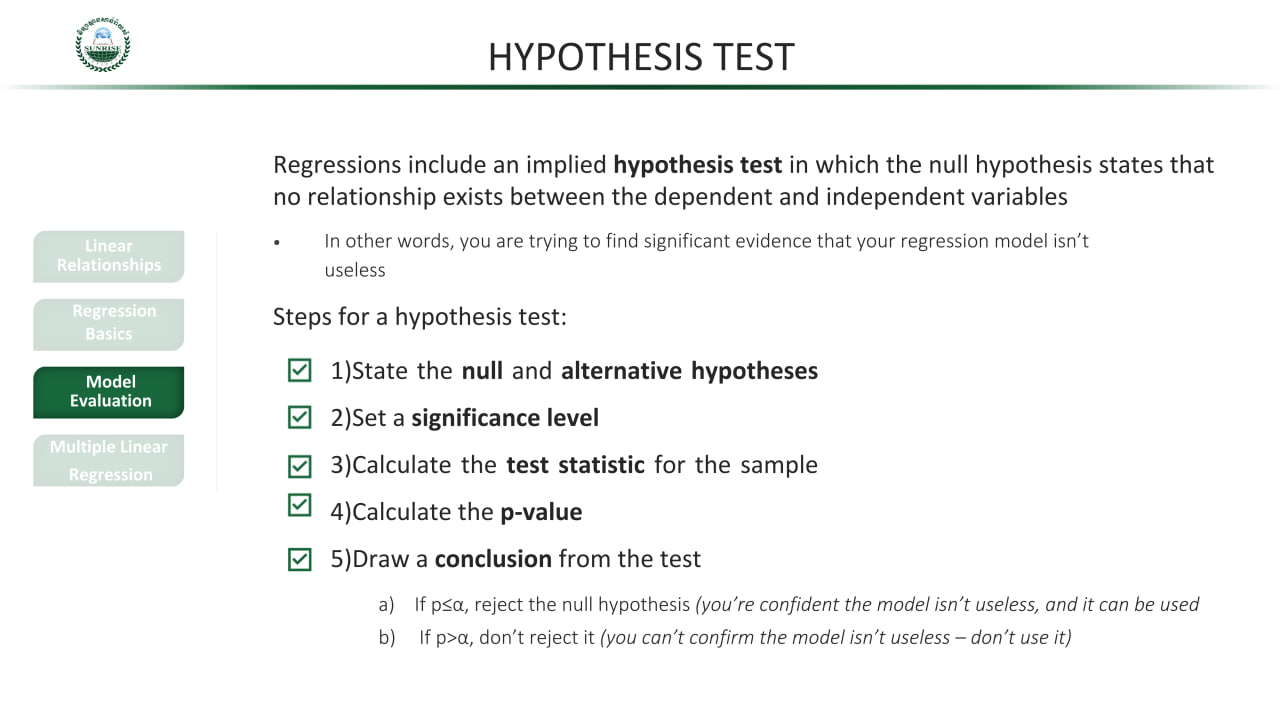

In [117]:
x1 = x_train.iloc[:, 0:4]

In [121]:
x_train.replace({True:1, 
           False:0}, inplace=True)

In [124]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [125]:
x_train = x_train.drop(columns='bmi')

In [126]:
import statsmodels.api as sm

x_train_con1 = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_con1).fit()


In [133]:
x_train

,age,sex,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
553,52,0,2,0,0,1,0,0
1083,32,1,1,0,0,0,0,1
1319,39,0,2,0,0,1,0,0
560,46,0,2,0,0,1,0,0
711,50,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
450,39,1,4,0,0,0,0,1
907,44,0,1,0,0,0,1,0
847,23,1,1,0,0,0,1,0
905,26,0,2,0,1,0,0,0


In [134]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1095,18,0,31.350,4,0,True,False,False,False
1330,57,0,25.740,2,0,False,False,True,False
690,21,1,27.360,0,0,True,False,False,False
565,19,0,30.495,0,0,False,True,False,False
145,29,0,38.830,3,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...
399,18,0,38.170,0,0,False,False,True,False
969,39,0,34.320,5,0,False,False,True,False
897,19,1,25.555,1,0,False,True,False,False
222,32,1,30.800,3,0,False,False,False,True


In [132]:
y_test

1095     4561.18850
1330    12629.16560
690      2104.11340
565      2128.43105
145      5138.25670
           ...     
399      1631.66830
969      8596.82780
897      2221.56445
222      5253.52400
563      9058.73030
Name: charges, Length: 98, dtype: float64

In [135]:
Linear_model.predict(x_test)

array([ 3391.37244068, 12132.45992209,  1893.57787399,  1470.59920617,
        5226.80608767, 11733.32687952,  4494.15310221, 10902.85555862,
        4687.86041371,  8717.60067651,  3476.67249248,  3296.64820934,
        3963.68854616, 12036.48729659,  1778.65671038,  8010.43693898,
        3907.37213235,  7481.19836345,  3393.44495554,  1967.90086566,
        6779.51158339, 12476.83333097,   907.84450942,  1711.31842036,
        4680.80415502, 12922.3450101 ,  5710.91902522,  1780.86457042,
        8275.48477846,   711.59742169,  4575.65399746,  7134.22254847,
        7685.03903012,  3452.51175817,   918.63305337,  6112.5179588 ,
        4160.46949455,  9956.44994453,  9808.73930443,  1275.79931009,
       11456.52941111,  7048.01258952,  9904.47959162,  4491.89732494,
        9218.47059274, 10570.62635701,  3204.10124038, 11803.50993976,
        8757.54324687, 11439.03218956,  2596.82375047,  1727.05607582,
       12829.42751662,  6296.10583003,  4636.42803388, 12200.84045549,
      

In [136]:
error  = y_test-Linear_model.predict(x_test)

In [137]:
error

1095    1169.816059
1330     496.705678
690      210.535526
565      657.831844
145      -88.549388
           ...     
399      715.535797
969     -182.015687
897      751.855237
222     -365.670864
563     -440.989210
Name: charges, Length: 98, dtype: float64

In [129]:
Linear_model.predict(x_test)

array([ 3391.37244068, 12132.45992209,  1893.57787399,  1470.59920617,
        5226.80608767, 11733.32687952,  4494.15310221, 10902.85555862,
        4687.86041371,  8717.60067651,  3476.67249248,  3296.64820934,
        3963.68854616, 12036.48729659,  1778.65671038,  8010.43693898,
        3907.37213235,  7481.19836345,  3393.44495554,  1967.90086566,
        6779.51158339, 12476.83333097,   907.84450942,  1711.31842036,
        4680.80415502, 12922.3450101 ,  5710.91902522,  1780.86457042,
        8275.48477846,   711.59742169,  4575.65399746,  7134.22254847,
        7685.03903012,  3452.51175817,   918.63305337,  6112.5179588 ,
        4160.46949455,  9956.44994453,  9808.73930443,  1275.79931009,
       11456.52941111,  7048.01258952,  9904.47959162,  4491.89732494,
        9218.47059274, 10570.62635701,  3204.10124038, 11803.50993976,
        8757.54324687, 11439.03218956,  2596.82375047,  1727.05607582,
       12829.42751662,  6296.10583003,  4636.42803388, 12200.84045549,
      

In [150]:
x_train1 = x_train.iloc[:, [0]]
x_train1

,age
553,52
1083,32
1319,39
560,46
711,50
...,...
450,39
907,44
847,23
905,26


In [151]:
x_train_con2 = sm.add_constant(x_train1)
model2 = sm.OLS(y_train,x_train_con2).fit()

In [152]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8835.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:34:29   Log-Likelihood:                -7446.1
No. Observations:                 877   AIC:                         1.490e+04
Df Residuals:                     875   BIC:                         1.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3416.7126    120.004    -28.472      0.000   -3652.241   -3181.184
age          268.1388      2.853     93.996      0.000     262.540     273.738
==============================================================================
Omnibus:                      725.406   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22406.427
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      26.710   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     2494.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:44:43   Log-Likelihood:                -7164.6
No. Observations:                 877   AIC:                         1.435e+04
Df Residuals:                     869   BIC:                         1.438e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2929.3301     76.283    -38.401      0.000   -3079.051   -2779.609
age                266.3542      2.081    127.984      0.000     262.270     270.439
sex               -429.3304     58.088     -7.391      0.000    -543.339    -315.321
children           460.3114     23.567     19.532      0.000     414.056     506.566
smoker            1.016e+04    608.441     16.698      0.000    8965.801    1.14e+04
region_northeast  -336.5350     54.754     -6.146      0.000    -444.001    -229.069
region_northwest  -677.4177     53.397    -12.686      0.000    -782.220    -572.616
region_southeast  -985.1625     53.783    -18.317      0.000   -1090.723    -879.602
region_southwest  -930.2149     53.223    -17.478      0.000   -1034.676    -825.754
==============================================================================
Omnibus:                      902.163   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54113.025
Skew:                           4.785   Prob(JB):                         0.00
Kurtosis:                      40.273   Cond. No.                     1.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
!pip install explainerdashboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 3.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.1/452.1 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 2.8 MB/s eta 0:00:00a 0:00:01


In [164]:
x_train

,age,sex,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
553,52,0,2,0,0,1,0,0
1083,32,1,1,0,0,0,0,1
1319,39,0,2,0,0,1,0,0
560,46,0,2,0,0,1,0,0
711,50,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
450,39,1,4,0,0,0,0,1
907,44,0,1,0,0,0,1,0
847,23,1,1,0,0,0,1,0
905,26,0,2,0,1,0,0,0


In [158]:
Linear_model2 = LinearRegression()
Linear_model2.fit(x_train, y_train)

LinearRegression()

In [161]:
x_train

,age,sex,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
553,52,0,2,0,0,1,0,0
1083,32,1,1,0,0,0,0,1
1319,39,0,2,0,0,1,0,0
560,46,0,2,0,0,1,0,0
711,50,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
450,39,1,4,0,0,0,0,1
907,44,0,1,0,0,0,1,0
847,23,1,1,0,0,0,1,0
905,26,0,2,0,1,0,0,0


In [163]:
Linear_model2.coef_

array([  266.3542086 ,  -429.33039947,   460.31135624, 10159.98599818,
         395.79748331,    54.91483223,  -252.82997822,  -197.88233732])

In [159]:
from explainerdashboard import RegressionExplainer , ExplainerDashboard

explainer = RegressionExplainer(Linear_model2, x_train, y_train)
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.50.227:8050


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [ ]:
VIF(X_test)